# Dissociation of a water dimer with BigDFT

This notebook is divided in two parts. 

The first one presents how to obtain the last figure presented in the BigDFT tutorial on the dissociation of a water dimer using the fragment approach with a jupyter notebook.

The second part is about comparing the results obtained for a similar system, where a water molecule has been replaced by a OH molecule, and a charge added to the system (this charge may be constrained).

###### First, let the notebook be aware of the BigDFT module
To do that the simplest way is to source the bigdftvars.sh script as indicated in the [corresponding webpage](http://bigdft.org/Wiki/index.php?title=Prepare_the_environment) of BigDFT website. So if you did not do so, reopen the notebook server in the correct environment.


In [6]:
from BigDFT import Logfiles as lf 
from futile import Yaml
import tarfile
#for interactive plots remove the following line
%matplotlib inline 

#### Now let us open the tarfile of all the recent calculations.
To to that is is enough to identify the tarfile with the log and the regular expression needed to classify them.

In [10]:
#function to identify an archive out of its regexp, solves the bug in re for '*' (solved in Python 2.7.6)
def get_re(archive,re):
    "This function retrieves the list of Logfiles instances from the file archived satisfying a regular expression"
    result=[]
    for f in archive.getnames():
        isthere=True
        for pattern in re.split('*'):
            isthere = isthere and (pattern in f)
        if isthere: 
            filetar=archive.extractfile(f)
            content=filetar.read()
            dictionary=Yaml.load(stream=content)
            result.append(lf.Logfile(dictionary=dictionary))
    return result

## Dissociation of a water dimer : the BigDFT fragment tutorial

We have put in the tarfile 'dissociation.tar.gz' the archive of all the logfiles which have been used for the present study. Let us now extract the files corresponding to each of the run classes.

In [11]:
archive=tarfile.open('dissociation.tar.gz')
# pattern to identify the files corresponding to the different calculations
log_re={'cubic': "*/H2O/*cubic*/dimer*/log-*yaml",
        'fragment': "*/H2O/fragment_1-4/dimer*/log-*yaml",
        'linear': "*/H2O/linear_1-4/dimer*/log-*yaml"}

In [12]:
# Find the logfiles locations
log_files={t: get_re(archive,log_re[t]) for t in log_re}

In [24]:
def distance(ats,pos):
    "Calculate the distance between two atoms in the logfile, providing the id"
    import numpy as np
    vs=[]
    for at in ats:
        d=pos[at] #atom spec
        e=d.keys()[0] #atom element
        vs.append(np.array(d[e]))
    dist=vs[0]-vs[1]
    return np.sqrt(dist.dot(dist))

In [39]:
# Find the energy given by each logfile
# Find the distance between molecules defined from the atoms 2 and 3
data={t: {'energies': [log.energy for log in log_files[t]],
          'distances': [distance([2,3],log.astruct['Positions']) for log in log_files[t]]} for t in log_files}

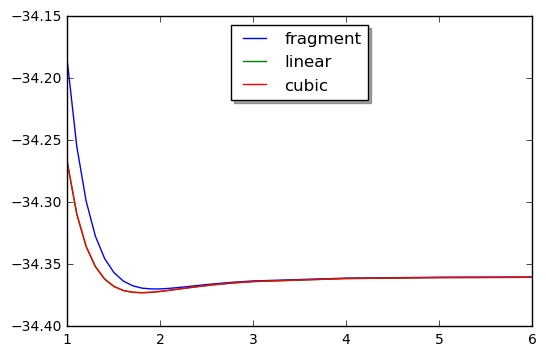

In [60]:
from BigDFT import Fragments as F
import matplotlib.pyplot as plt
import numpy as np
keys=[]
fig, ax = plt.subplots()
ax.set_xlim([1,6])
for t in data:
    xs=np.array(data[t]['distances'])
    ys=np.array(data[t]['energies'])
    reordered=np.argsort(xs)
    ax.plot(xs[reordered],ys[reordered],label=t)
ax.legend(loc='upper center', shadow=True, fontsize='large')
#plt.plot(fragment_dist, fragment_en, 'o', linear_dist, linear_en, 's', cubic_dist, cubic_en, 'o')